# deconstruct_image

## Overview

### In this program, we need to do four things:
- #### First we need to break apart an image into multiple images 
- #### Second we need to make a mask from each image
- #### Third we need to use each mask to make a wordcloud
- #### Fourth we need to resize each of the wordcloud images
- #### Fifth we need to recombine each image

In [32]:
import PIL
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

# Is it possible to fit the wordclouds for each state into a single wordcloud image with legible words for each image?

- ## Yes, the california word cloud image dimensions are 2283x2987 that is smaller than the california image dimensions that are 4800x8000 in the largest US map image.

## What is the largest image that can be saved?

- ### The largest image that can be saved is about the size of 30720x19392 pixels 

## Use the PIL.Image.resize module to make a image as big as possible:

- ### import the image

  
- ### resize the image
  
  
- ### save the image


In [5]:
# import the image
img = PIL.Image.open('../word_cloud/sample_images/us_map.png',mode = 'r')

# resize the image
mult = 2
new_width = mult*img.width
new_height = mult*img.height
img2 = img.resize((new_width,new_height))

# save the image
img2.save('../word_cloud/resized_images/made_bigger/'+str(mult)+'x_size_image.png','PNG')

(960, 606)


## How small can we resize a wordcloud image without decresing legibility?

### Use PIL.Image.resize module to view when words become illegible when reducing the size of a wordcloud image:

- #### import the image

  
- #### resize the image 
    - #### select new dimensions

    - #### select filter

    - #### resize

- #### save the image


- #### view words in the image

In [52]:
# import the image
img = PIL.Image.open('../word_cloud/figs/word_cloud_masked_transformed_color_scale_data-scientist_CA.png',mode = 'r')

# resize an image
## select new dimensions
mult = .5/2/2/2
new_width = int(mult*img.width)
new_height = int(mult*img.height)

## apply filter & resize
img2 = img.resize((new_width,new_height), Image.LANCZOS) 

# save the image
img2.save('../word_cloud/resized_images/made_smaller/'+'word_cloud_image_resized_filtered_'+str(mult)+'x_size_image.png','PNG')

# Mapping US States in Python with Geopandas
## ref - https://medium.com/@erikgreenj/mapping-us-states-with-geopandas-made-simple-d7b6e66fa20d

## data downloaded from - https://www.arcgis.com/home/item.html?id=b07a9393ecbd430795a6f6218443dccc

In [9]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


## Load the data

In [11]:
usa = gpd.read_file('../word_cloud/sample_images/states_21basic/states.shp')

## View the data

In [13]:
# view the first 5 rows
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,(POLYGON ((-160.0738033454681 22.0041773479577...
1,Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...
2,Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...
3,Maine,4,23,New England,ME,(POLYGON ((-69.77727626137293 44.0741483685119...
4,North Dakota,5,38,West North Central,ND,POLYGON ((-98.73043728833767 45.93827137024809...


In [33]:
# view the first row rows of a column
type(usa.geometry.loc[0])


shapely.geometry.multipolygon.MultiPolygon

## Plot some maps

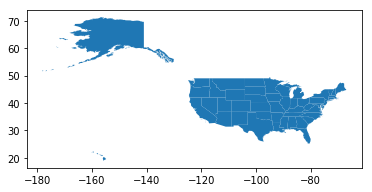

In [14]:
# plot the whole map
usa.plot()

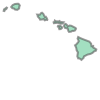

In [23]:
# plot an individual state
usa.loc[0,'geometry']

# Mapping US States Data with Plotly

## ref - https://www.geeksforgeeks.org/python-geographical-plotting-using-plotly/

In [34]:
# importing all necessary libraries 
import plotly.plotly as py 
import plotly.graph_objs as go 
import pandas as pd 

# some more libraries to plot graph 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 

In [41]:
# To establish connection 
init_notebook_mode(connected = True) 
  
# type defined is choropleth to 
# plot geographical plots 
data = dict(type = 'choropleth', 
  
            # location: Arizoana, California, Newyork 
            locations = ['AZ', 'CA', 'NY'], 
              
            # States of USA 
            locationmode = 'USA-states', 
              
            # colorscale can be added as per requirement 
            colorscale = 'Portland', 
            showscale=False,
            # text can be given anything you like 
            text = ['text 1', 'text 2', 'text 3'], 
            z = [1.0, 2.0, 3.0], 
            colorbar = {'title': 'Colorbar Title Goes Here'}) 
              
layout = dict(geo ={'scope': 'usa'}) 
  
# passing data dictionary as a list  
choromap = go.Figure(data = [data], layout = layout) 
  
# plotting graph 
iplot(choromap) 

In [40]:
data

{'colorbar': {'title': 'Colorbar Title Goes Here'},
 'colorscale': 'Portland',
 'locationmode': 'USA-states',
 'locations': ['AZ', 'CA', 'NY'],
 'text': ['text 1', 'text 2', 'text 3'],
 'type': 'choropleth',
 'z': [1.0, 2.0, 3.0]}

# Mapping in Python with Geopandas
## ref - http://darribas.org/gds15/content/labs/lab_03.html

In [8]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
import pysal as ps
from pysal.contrib.viz import mapping as maps
from IPython.display import IFrame

In [ ]:
lsoas_link = '../word_cloud/sample_images/BoundarylineshapefileofUS1457/BoundarylineshapefileofUS14.shp'
lsoas = gpd.read_file(lsoas_link)

In [ ]:
lsoas.head()

In [ ]:
lsoas.plot(figsize=(30,40))

In [ ]:
# Show a single place
lsoas.loc[0, 'geometry']

In [ ]:
lsoas.head()

In [ ]:
f, ax = plt.subplots(1, figsize=(12, 4))
ax = lsoas.plot(axes=ax)
plt.show()

In [ ]:
f, ax = plt.subplots(1, figsize=(12, 4))
ax = lsoas.plot(axes=ax)
lims = plt.axis('equal')
plt.show()

In [ ]:
f, ax = plt.subplots(1)
#for poly in lsoas['geometry']:
gpd.plotting.plot_polygon_collection(ax,lsoas['geometry'])

plt.show()
#    .plot_dataframe(ax, poly, linewidth=0.1, edgecolor='grey')

# Awesome Guide - Use the morphological gradient to get good edges
## ref - https://stackoverflow.com/questions/46036172/irregular-shape-detection-and-measurement-in-python-opencv

In [ ]:
import pandas as pd
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
# Step 1
img = cv2.imread('../word_cloud/sample_images/massive_us_map.jpg')
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(img)

In [ ]:
blur = cv2.GaussianBlur(img, (7, 7), 2)
h, w = img.shape[:2]

"""Morphological gradient"""

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
gradient = cv2.morphologyEx(blur, cv2.MORPH_GRADIENT, kernel)
plt.figure(figsize=(20,20))
cv2.imshow('Morphological gradient', gradient)
plt.axis('off')
plt.imshow(gradient)

In [ ]:
# Step 2
"""Binarize gradient"""

lowerb = np.array([0, 0, 0])
upperb = np.array([15, 15, 15])
binary = cv2.inRange(gradient, lowerb, upperb)
plt.figure(figsize=(20,20))
cv2.imshow('Binarized gradient', binary)
plt.axis('off')
plt.imshow(binary)

In [ ]:
# Step 3
"""Flood fill from the edges to remove edge crystals"""

for row in range(h):
    if binary[row, 0] == 255:
        cv2.floodFill(binary, None, (0, row), 0)
    if binary[row, w-1] == 255:
        cv2.floodFill(binary, None, (w-1, row), 0)

for col in range(w):
    if binary[0, col] == 255:
        cv2.floodFill(binary, None, (col, 0), 0)
    if binary[h-1, col] == 255:
        cv2.floodFill(binary, None, (col, h-1), 0)
plt.figure(figsize=(20,20))
cv2.imshow('Filled binary gradient', binary)
plt.axis('off')
plt.imshow(binary)

In [ ]:
# Step 4
"""Cleaning up mask"""

foreground = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
foreground = cv2.morphologyEx(foreground, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(20,20))
cv2.imshow('Cleanup up crystal foreground mask', foreground)
plt.axis('off')
plt.imshow(foreground)

In [ ]:
# Step 5
"""Creating background and unknown mask for labeling"""

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (17, 17))
background = cv2.dilate(foreground, kernel, iterations=3)
unknown = cv2.subtract(background, foreground)
plt.figure(figsize=(20,20))
cv2.imshow('Background', background)
plt.axis('off')
plt.imshow(background)

In [ ]:
# Step 6
"""Watershed"""

markers = cv2.connectedComponents(foreground)[1]
markers += 1  # Add one to all labels so that background is 1, not 0
markers[unknown==255] = 0  # mark the region of unknown with zero
markers = cv2.watershed(img, markers)
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(markers)

In [ ]:
# Step 7
"""Assign the markers a hue between 0 and 179"""

hue_markers = np.uint8(179*np.float32(markers)/np.max(markers))
blank_channel = 255*np.ones((h, w), dtype=np.uint8)
marker_img = cv2.merge([hue_markers, blank_channel, blank_channel])
marker_img = cv2.cvtColor(marker_img, cv2.COLOR_HSV2BGR)
plt.figure(figsize=(20,20))
cv2.imshow('Colored markers', marker_img)
plt.axis('off')
plt.imshow(marker_img)

In [ ]:
# Step 8
"""Label the original image with the watershed markers"""

labeled_img = img.copy()
labeled_img[markers>1] = marker_img[markers>1]  # 1 is background color
labeled_img = cv2.addWeighted(img, 0.5, labeled_img, 0.5, 0)
plt.figure(figsize=(20,20))
cv2.imshow('watershed_result.png', labeled_img)
plt.axis('off')
plt.imshow(labeled_img)

In [ ]:
# Save a numpy
labeled_img.save('sample_images/us_map_watershed_result.png')

# Use OpenCV to draw filled contour of US state

In [82]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [305]:
img = cv2.imread('sample_images/us_map.png',0)

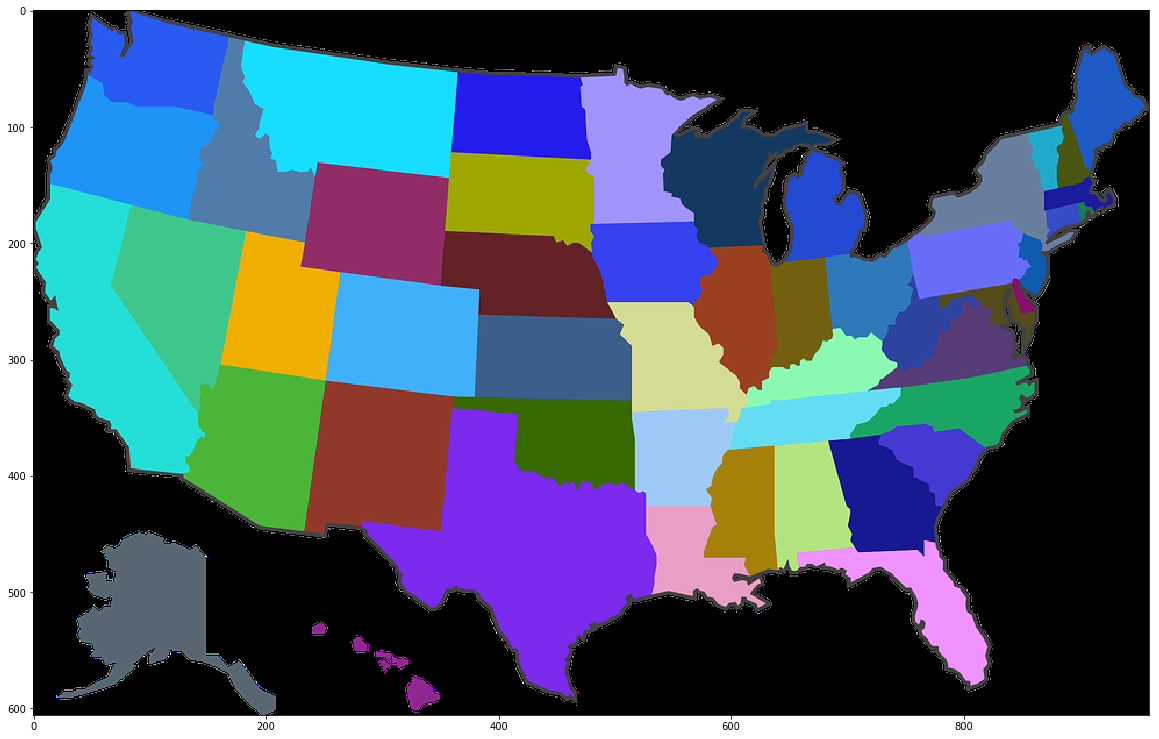

In [304]:
plt.figure(figsize=(20,20))
plt.imshow(img,cmap='gray')

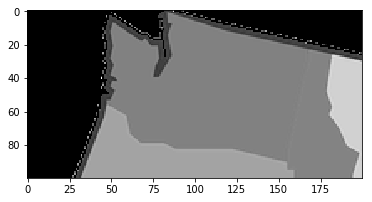

In [234]:
oregon = img[0:100,0:200]
plt.imshow(oregon,cmap='gray')

In [248]:
# replace all black pixels with white pixels
for i in range(len(img)):
    for j in range(len(img[0])):
        if img[i][j]==0:
            img[i][j]=255

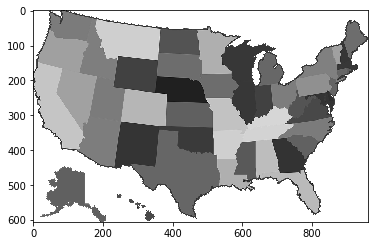

In [249]:
plt.imshow(img,cmap='gray')

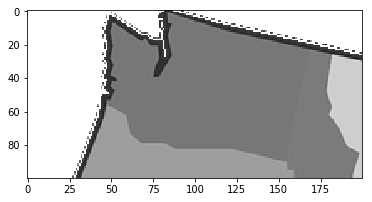

In [251]:
oregon = img[0:100,0:200]
plt.imshow(oregon,cmap='gray')

val, thresh = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh,cmap='gray')

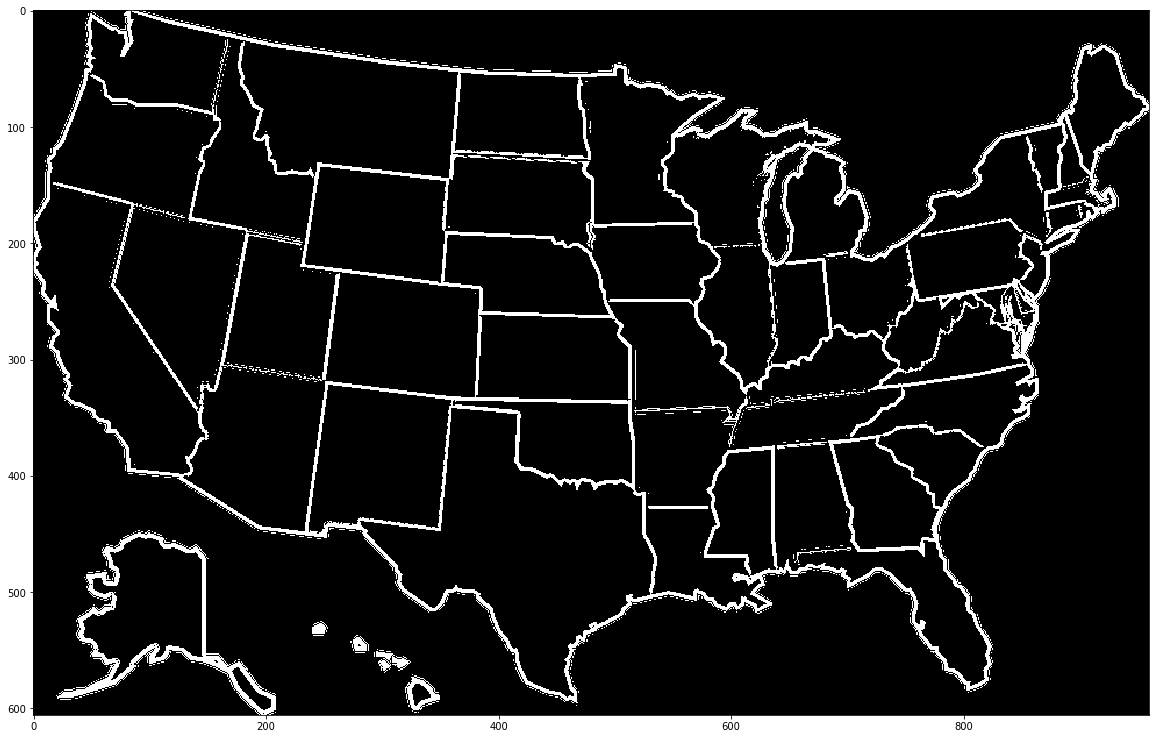

In [301]:
thresh = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,7,1)
plt.figure(figsize=(20,20))
plt.imshow(thresh,cmap='gray')

In [263]:
empty_mat = np.zeros(thresh.shape)

In [264]:
image,contours,hierarchy=cv2.findContours(thresh,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [279]:
np.shape(hierarchy)
contours

(1, 1190, 4)

In [284]:
unique_cont = []
for i in range(len(contours)): 
        cv2.drawContours(empty_mat,contours,1,255,-1)

-1

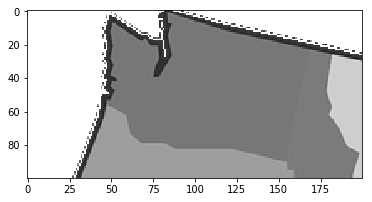

In [290]:
plt.imshow(oregon,cmap='gray')

In [108]:
hierarchy[0][len(contours)-1][3]

23

In [98]:
for i in range(len(contours)): 
    if hierarchy[0][i][3] == 0:
        hierarchy

array([[[  1,  -1,  -1,  -1],
        [  2,   0,  -1,  -1],
        [  3,   1,  -1,  -1],
        ...,
        [959, 957,  -1, 504],
        [960, 958,  -1, 504],
        [ -1, 959,  -1, 504]]], dtype=int32)

# Deconstruct colorful US image
### ref for image - https://pixabay.com/vectors/maps-country-america-states-land-812736/

In [ ]:
# import the image
image = Image.open('../word_cloud/sample_images/us_map.png',mode='r')

In [ ]:
# Get the width and the height of the image
w,h=image.getbbox()[2],image.getbbox()[3]

In [ ]:
image

In [ ]:
image.width,image.height

In [ ]:
# View a piece of the image
cropped_img = image.crop((40,-10,170,95))
cropped_img_edge_enhance_more = cropped_img.filter(ImageFilter.EDGE_ENHANCE_MORE)
cropped_img.save('../word_cloud/sample_images/us_map_cropped_edge_enhance_more.png','PNG')
cropped_img

# Steps for finding Centers of multiple blobs in an Image
## ref - https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/ 

In [ ]:
# read image through command line
img = cv2.imread('sample_images/us_map_cropped_edge_enhance_more.png',-1)

# convert the image to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# convert the grayscale image to binary image
ret,thresh = cv2.threshold(gray_image,thresh=100, maxval=255, type=cv2.THRESH_BINARY)
 
# Find contours in the binary image:
im2, contours, hierarchy = cv2.findContours(thresh,
                                           cv2.RETR_EXTERNAL,
                                           cv2.CHAIN_APPROX_NONE)
for c in contours:
    # calculate moments for each contour
    M = cv2.moments(c)
    if M["m00"] != 0: 
        cX = int(M["m10"] / M["m00"]) 
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0
    cv2.circle(img, (cX, cY), 5, (255, 255, 255), -1)
    cv2.putText(img, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
 
    # display the image
    cv2.imshow("Image", img)
    
plt.figure(figsize=(20,20))
plt.imshow(img)

In [ ]:
plt.imshow(thresh)

# Simple Blob Detector
## ref - https://www.learnopencv.com/blob-detection-using-opencv-python-c/

In [ ]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 10;
params.maxThreshold = 200;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 1500
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
 
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87
 
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01
 
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
    detector = cv2.SimpleBlobDetector(params)
else : 
    detector = cv2.SimpleBlobDetector_create(params)

# Simple Blob detector Example

In [ ]:
# Standard imports
import cv2
import numpy as np;
 
# Read image
im = cv2.imread("../word_cloud/sample_images/us_map.png", cv2.IMREAD_GRAYSCALE)
 
# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector()
 
# Detect blobs.
keypoints = detector.detect(im)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)

# Plot on maps with pyshp
## ref - https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f

In [ ]:
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))
%matplotlib inline

In [ ]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [ ]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [ ]:
plot_shape(5)

In [ ]:
def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [ ]:
# ref shapefile download - https://map.igismap.com/maps/layer_view/work20180912114331:usboundaries724/768#
shp_path = "../word_cloud/sample_images/USA_States_Generalized/USA_States_Generalized.shp"
sf = shp.Reader(shp_path)
# Continental US
y_lim = (23, 50) # lat 
x_lim = (-128, -65) # long
state_id = []
#state_id = [0, 10, 3, 5, 6, 7, 8, 30]
plot_map_fill_multiples_ids("US - States", state_id, sf, x_lim, 
                             y_lim, color = 'r', figsize = (15,9))

In [ ]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [ ]:
def plot_map2(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [ ]:
shp_path = "../word_cloud/sample_images/BoundarylineshapefileofUS1457/BoundarylineshapefileofUS14.shp"

sf = shp.Reader(shp_path)
# Continental US
y_lim = (23, 50) # lat 
x_lim = (-128, -65) # long
state_id = [0]
plot_map_fill_multiples_ids("US - States", state_id, sf, x_lim, 
                             y_lim, color = 'r', figsize = (15,9))

# Plotting Shapefiles
## ref - https://gis.stackexchange.com/questions/202839/plotting-large-shapefiles-with-matplotlib

In [ ]:
def plot_map2(sf, figsize = (15,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    for shape in shape.shapeRecords():
        xy = [i for i in shape.shape.points[:]]
        x = [i[0] for i in xy]
        y = [i[1] for i in xy]
        plt.plot(x, y,'k')

In [ ]:
plt.figure(figsize = (20,20))
shpFilePath = "../word_cloud/sample_images/BoundarylineshapefileofUS1457/BoundarylineshapefileofUS14.shp"
shape = shp.Reader(shpFilePath)
for shapes in shape.shapeRecords():
    x = [i[0] for i in shapes.shape.points[:]]
    y = [i[1] for i in shapes.shape.points[:]]
    plt.plot(x, y)

# Use Basemaps

In [310]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits


In [6]:
#Hack to fix missing PROJ4 env var
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

ImportError: No module named conda

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

KeyError: 'PROJ_LIB'

In [ ]:
from itertools import chain
import pandas as pd
from netCDF4 import Dataset
from netCDF4 import date2index
from datetime import datetime